
# **5. USGS stream flow in txt format**

![picture](https://drive.google.com/uc?export=view&id=13aTJ2VNYDnulKDUIX1idiuhU0vSr5Kw4)

The U.S. Geological Survey ([**USGS**](https://waterwatch.usgs.gov/?id=ww_current)) selects "a suitable site along a river or stream and constructs a gage house to hold equipment that measures and records the height of the water surface (gage height or stage). The gage house also can hold equipment that measures water-quality parameters, such as temperature, pH, dissolved oxygen, and dissolved chemicals, and weather conditions, such as air temperature, precipitation, and wind speed." "The volume of water passing a specific point in a given interval of time is called discharge.  Discharge generally is measured in cubic feet per second and most often is determined by making measurements of a particular cross-section area of the river and of how fast the water is flowing per second (velocity) past that cross section.  Discharge then is calculated by multiplying the width, depth, and velocity of that section of the river."

##**4.1 Download data from selected gauges**

In [ ]:
!pip install git+https://github.com/wzhengui/pylibs.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/wzhengui/pylibs.git to /tmp/pip-req-build-ss1mokk9
  Running command git clone --filter=blob:none --quiet https://github.com/wzhengui/pylibs.git /tmp/pip-req-build-ss1mokk9
  Resolved https://github.com/wzhengui/pylibs.git to commit b37f1b0dc9ae52fd4ea46c0732fbe92a46b896a8
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 17.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 70.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 63.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 53.4 MB/s eta 0:00:00
  Created wheel for pylibs

In [ ]:
from pylib import *
import pandas as pd

In [ ]:
# download data from selected gauges
StartT='2017-12-30'; EndT='2020-01-01'
#------------------------------------------------------------------------------
#get stations to be downloaded
#------------------------------------------------------------------------------
#stations=unique(array([i.split(',')[1] for i in open('stations.txt').readlines()])) #SFBay
stations=['02080500','02091814','02105769'] #Albemarle-Pamlico Sound
rnames=['Roanoke','Neuse','CapeFear']
y1=num2date(datenum(StartT)).year; y2=num2date(datenum(EndT)-1/24).year

for m,station in enumerate(stations):
    #get links
    urls=['https://nwis.waterdata.usgs.gov/usa/nwis/uv/?cb_00060=on&format=rdb&site_no='+station+'&period=&begin_date='+StartT+'&end_date='+EndT,  #15-min flow
          'https://waterdata.usgs.gov/nwis/dv?cb_00060=on&format=rdb&site_no='+station+'&period=&begin_date='+StartT+'&end_date='+EndT] #daily flow
    tags=['15min','daily']

    #download usgs flow data; first, try 15min data; if fails, then, try daily data
    #The zip() function takes iterables (can be zero or more), aggregates them in a tuple
    for url,tag in zip(urls,tags):
        fname='{}/{}_{}_{}_{}_{}.txt'.format('.',rnames[m],station,y1,y2,tag) if y1!=y2 else '{}/{}_{}_{}.txt'.format(sdir,station,y1,tag)
        if fexist(fname): break
        print('download usgs flow: {}'.format(station))
        urlsave(url,fname)
        if os.path.getsize(fname)<3000: os.remove(fname)
        if fexist(fname): break

In [ ]:
path = %pwd
print(path)
os.listdir(path)

/content


['.config',
 'CapeFear_02105769_2017_2019_15min.txt',
 'Roanoke_02080500_2017_2019_15min.txt',
 'Neuse_02091814_2017_2019_15min.txt',
 'sample_data']

##**4.2 Read files downloaded and make the plot**

<ipython-input-15-b6b1875d35cb>:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('./'+file,skiprows=27,sep="\\t")


Roanoke_02080500_2017_2019_15min.txt has EST


<ipython-input-15-b6b1875d35cb>:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('./'+file,skiprows=27,sep="\\t")


Neuse_02091814_2017_2019_15min.txt has EST


<ipython-input-15-b6b1875d35cb>:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('./'+file,skiprows=27,sep="\\t")


CapeFear_02105769_2017_2019_15min.txt has EST


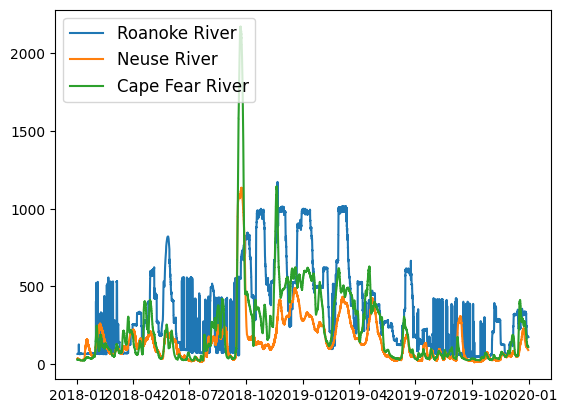

In [ ]:
usgs=['Roanoke_02080500_2017_2019_15min.txt','Neuse_02091814_2017_2019_15min.txt','CapeFear_02105769_2017_2019_15min.txt']
st=datenum(2018,1,1) # start time
et=datenum(2019,12,30) # end time
dt=900 # time step of flow.th (second)
pt=1 # check result 1:on
ntime=arange(0,(et-st)*86400,dt) # new time window

for i,file in enumerate(usgs):
  df = pd.read_csv('./'+file,skiprows=27,sep="\\t")
  df = df.drop([0])
  if df['tz_cd'][1]=='EST': print('{} has EST'.format(file));df['tz_cd'][1]='Etc/GMT+4'
  #time=pd.to_datetime(df['datetime']).dt.tz_localize(df['tz_cd'][1]).dt.tz_convert('GMT')
  tz='Etc/GMT+4'
  time=pd.to_datetime(df['datetime']).dt.tz_localize(df['tz_cd'][1]).dt.tz_convert('GMT')
  rd=df[df.columns[4]].values.astype('float')*0.0283168
  time= datenum(time.values.astype('str')).astype('float')

  #subset of time and data
  fpt=(time>=st)*(time<=et+1); time=time[fpt]; rd=rd[fpt]

  #interpolate the data to new time window and add it into new matrix
  time=(time-st)*86400; time,idx=unique(time,return_index=True); rd=rd[idx]
  #interpolate and rescale river discharge based on drainage area
  #nrd = -interpolate.interp1d(time, rd)(ntime)
  datetime=num2date(time/86400+datenum(2018,1,1))
  plot(datetime,rd)

legend(['Roanoke River','Neuse River','Cape Fear River'],loc=2,fontsize=12)
